### 데이터 읽어오기

In [1]:
import pandas as pd

In [ ]:
df=pd.read_csv('seoul.csv', encoding='cp949')
df.head()

In [ ]:
df.set_index('날짜', inplace= True)
df.head()

In [2]:
df=pd.read_csv('seoul.csv', encoding='cp949', index_col=0)
df.head()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1907-10-01,108,13.5,7.9,20.7
1907-10-02,108,16.2,7.9,22.0
1907-10-03,108,16.2,13.1,21.3
1907-10-04,108,16.5,11.2,22.0
1907-10-05,108,17.6,10.9,25.4


In [ ]:
df.index.dtype

In [4]:
df.columns   

Index(['평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [3]:
del df['지점']        #'지점' column 삭제
df.head(3)

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
1907-10-01,13.5,7.9,20.7
1907-10-02,16.2,7.9,22.0
1907-10-03,16.2,13.1,21.3


In [5]:
# 컬럼의 데이터타입 확인  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41506 entries, 1907-10-01 to 2022-07-25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   평균기온(℃)  40750 non-null  float64
 1   최저기온(℃)  40748 non-null  float64
 2   최고기온(℃)  40747 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


###  서울이 가장 더웠던 날은 언제?

In [6]:
# isnull 함수로 결측치(NaN) 찾기. 
# DataFrame 값 중에서 NaN인 행만 추출

df[df['평균기온(℃)'].isnull()]

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
1950-09-01,NaN,NaN,NaN
1950-09-02,NaN,NaN,NaN
1950-09-03,NaN,NaN,NaN
1950-09-04,NaN,NaN,NaN
1950-09-05,NaN,NaN,NaN
...,...,...,...
1953-11-26,NaN,NaN,NaN
1953-11-27,NaN,NaN,NaN
1953-11-28,NaN,NaN,NaN


In [7]:
df.dropna(how='any', inplace=True)  # how='any' 행 데이터 중 하나라도 NaN이면 해당 행 제거  
                                    # how='all' 행 데이터의 모든 값이 NaN 인 행 제거

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 1907-10-01 to 2022-07-25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   평균기온(℃)  40747 non-null  float64
 1   최저기온(℃)  40747 non-null  float64
 2   최고기온(℃)  40747 non-null  float64
dtypes: float64(3)
memory usage: 1.2+ MB


In [ ]:
df['최고기온(℃)'].max()

In [9]:
df['최저기온(℃)'].min()

-23.1

In [10]:
df['최저기온(℃)'].idxmin()

'1927-12-31'

In [11]:
df['최고기온(℃)'].idxmax()    #'최고기온(℃)' 열 중 최대값에 해당하는 index 찾기

'2018-08-01'

In [12]:
df.loc['2018-08-01']

평균기온(℃)    33.6
최저기온(℃)    27.8
최고기온(℃)    39.6
Name: 2018-08-01, dtype: float64

In [13]:
df.loc['2018-08-01','최고기온(℃)']     # 인덱싱

39.6

In [ ]:
print('기상관측 이래 서울의 최고기온이 가장 높았던 날은',
      df['최고기온(℃)'].idxmax(), '로, ',
      df.loc['2018-08-01','최고기온(℃)'], '도 였습니다.')

In [14]:
df['최고기온(℃)'].nlargest(5)    #'최고기온(℃)'이 높은 5개 출력

날짜
2018-08-01    39.6
1994-07-24    38.4
2018-07-31    38.3
1939-08-10    38.2
1943-08-24    38.2
Name: 최고기온(℃), dtype: float64

In [15]:
df['최저기온(℃)'].nsmallest(5)   #'최저기온(℃)'이 낮은 5개 출력

날짜
1927-12-31   -23.1
1931-01-11   -22.5
1920-01-04   -22.3
1928-01-05   -22.2
1931-01-10   -21.9
Name: 최저기온(℃), dtype: float64

In [ ]:
# 최저 기온 응용
print('기상관측 이래 서울의 최저기온이 가장 낮았던 날은',
      df['최저기온(℃)'].idxmin(), '로, ',
      df.loc['1927-12-31','최저기온(℃)'], '도 였습니다.')

### 내 생일 기온 변화 그래프 그리기

In [16]:
df.index

Index(['1907-10-01', '1907-10-02', '1907-10-03', '1907-10-04', '1907-10-05',
       '1907-10-06', '1907-10-07', '1907-10-08', '1907-10-09', '1907-10-10',
       ...
       '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20',
       '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25'],
      dtype='object', name='날짜', length=40747)

In [17]:
birth=df[df.index.str.contains('03-06')]
birth.head()

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
1908-03-06,3.3,-0.5,7.9
1909-03-06,0.6,-2.5,3.4
1910-03-06,-3.1,-8.6,2.0
1911-03-06,6.1,4.9,7.4
1912-03-06,5.1,0.4,10.0


In [18]:
birth.tail(30)

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
2003-06-20,21.9,18.9,25.5
2003-06-21,23.5,19.4,27.9
2003-06-22,24.5,19.9,30.4
2003-06-23,21.4,18.9,23.9
2003-06-24,16.7,15.8,18.9
2003-06-25,19.2,15.8,23.6
2003-06-26,22.4,18.1,27.5
2003-06-27,20.0,18.2,22.5
2003-06-28,22.8,18.1,28.1


In [19]:
df.index.str[5:]

Index(['10-01', '10-02', '10-03', '10-04', '10-05', '10-06', '10-07', '10-08',
       '10-09', '10-10',
       ...
       '07-16', '07-17', '07-18', '07-19', '07-20', '07-21', '07-22', '07-23',
       '07-24', '07-25'],
      dtype='object', name='날짜', length=40747)

In [20]:
birth=df[df.index.str[5:]=='03-06']
birth.tail(20)

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
2003-03-06,3.4,1.7,4.1
2004-03-06,-3.4,-5.0,-0.8
2005-03-06,0.5,-3.5,5.1
2006-03-06,5.9,0.6,12.1
2007-03-06,-5.0,-7.6,-1.6
2008-03-06,4.3,1.5,7.8
2009-03-06,1.6,-1.9,4.0
2010-03-06,6.0,2.0,10.7
2011-03-06,3.4,1.2,7.4


In [21]:
birth['최고기온(℃)'].idxmax()

'2013-03-06'

In [22]:
max_temp=list(birth['최고기온(℃)'])
max_temp

[7.9,
 3.4,
 2.0,
 7.4,
 10.0,
 3.6,
 14.1,
 6.0,
 2.5,
 3.3,
 9.6,
 10.0,
 4.0,
 8.5,
 8.3,
 6.5,
 1.6,
 -1.6,
 9.8,
 7.7,
 6.6,
 9.4,
 8.5,
 7.6,
 12.6,
 -4.0,
 4.1,
 8.4,
 2.0,
 6.2,
 10.0,
 6.7,
 9.9,
 2.5,
 8.2,
 9.6,
 1.8,
 -2.0,
 3.4,
 2.7,
 0.5,
 8.2,
 11.2,
 1.2,
 3.1,
 4.1,
 1.4,
 7.7,
 9.0,
 11.1,
 9.0,
 6.2,
 7.4,
 9.6,
 0.2,
 5.1,
 1.7,
 6.4,
 5.0,
 1.6,
 -4.0,
 8.5,
 2.8,
 13.4,
 5.8,
 10.2,
 11.1,
 13.6,
 7.5,
 11.4,
 3.2,
 2.8,
 7.9,
 5.3,
 1.9,
 12.2,
 4.6,
 2.5,
 2.3,
 10.1,
 11.1,
 6.9,
 8.3,
 13.4,
 11.6,
 10.1,
 8.0,
 14.0,
 10.5,
 6.8,
 8.1,
 4.6,
 4.1,
 -0.8,
 5.1,
 12.1,
 -1.6,
 7.8,
 4.0,
 10.7,
 7.4,
 4.6,
 14.3,
 5.0,
 10.4,
 12.9,
 4.0,
 10.9,
 12.4,
 10.1,
 11.6,
 6.8]

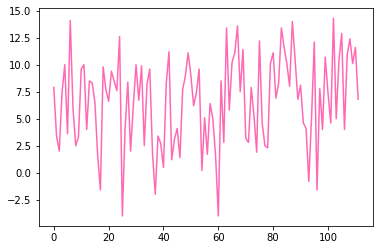

In [23]:
import matplotlib.pyplot as plt

#max_temp=list(birth['최고기온(℃)'])

plt.plot(max_temp, 'hotpink')

plt.show()

#### 내 생일의 최고기온과 최저기온  3개씩 추출하기 (높은 순, 낮은순)

In [ ]:
birth['최고기온(℃)'].nlargest(3)

In [ ]:
birth['최저기온(℃)'].nsmallest(3)

In [ ]:
import matplotlib.pyplot as plt

max_temp=list(birth['최고기온(℃)'])
min_temp=list(birth['최저기온(℃)'])

plt.plot(max_temp, 'hotpink')
plt.plot(min_temp, 'skyblue')

plt.show()

###  파이썬 그래프 한글이 깨질때&마이너스 부호 사용

In [24]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [25]:
birth['2000-03-06':]   # 2000년 이후 

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
2000-03-06,2.7,-1.6,6.8
2001-03-06,3.4,0.5,8.1
2002-03-06,1.8,-0.9,4.6
2003-03-06,3.4,1.7,4.1
2004-03-06,-3.4,-5.0,-0.8
2005-03-06,0.5,-3.5,5.1
2006-03-06,5.9,0.6,12.1
2007-03-06,-5.0,-7.6,-1.6
2008-03-06,4.3,1.5,7.8


In [27]:
my_birth=birth['2000-03-06':]
my_birth.head()

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
2000-03-06,2.7,-1.6,6.8
2001-03-06,3.4,0.5,8.1
2002-03-06,1.8,-0.9,4.6
2003-03-06,3.4,1.7,4.1
2004-03-06,-3.4,-5.0,-0.8


In [ ]:
len(my_birth)

In [ ]:
list(range(len(my_birth)))

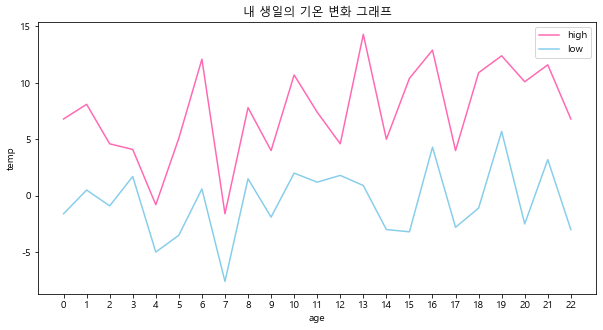

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
max_temp=list(my_birth['최고기온(℃)'])
min_temp=list(my_birth['최저기온(℃)'])

plt.title('내 생일의 기온 변화 그래프')       # 제목 설정
plt.plot(max_temp, 'hotpink', label = 'high') # 레이블 표시
plt.plot(min_temp, 'skyblue', label = 'low')  # 레이블 표시
plt.legend()    # 범례 표시
plt.xlabel('age')
plt.ylabel('temp')
plt.xticks(range(len(my_birth)))
plt.show()